# Image segmentation blog

### Blog
https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/?utm_source=blog&utm_medium=computer-vision-implementing-mask-r-cnn-image-segmentation

In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [4]:
pwd

'C:\\Users\\LENOVO\\Desktop\\Data_Science'

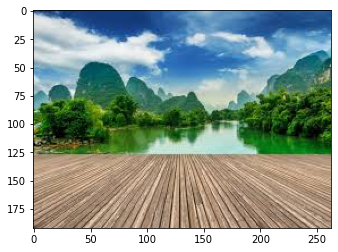

In [6]:
image = plt.imread('C:/Users/LENOVO/Desktop/Data_Science/images/1.jpeg')
image.shape
plt.imshow(image)

It is a three-channel image (RGB). We need to convert it into grayscale so that we only have a single channel. Doing this will also help us get a better understanding of how the algorithm works.

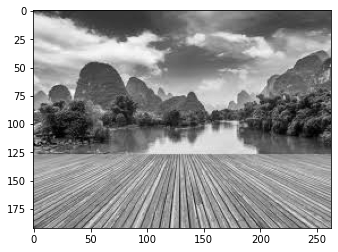

In [7]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [8]:
gray.shape

(192, 263)

In [10]:
gray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

The height and width of the image is 192 and 263 respectively. We will take the mean of the pixel values and use that as a threshold. If the pixel value is more than our threshold, we can say that it belongs to an object. If the pixel value is less than the threshold, it will be treated as the background. Let’s code this:

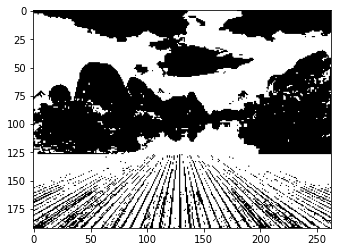

In [11]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Nice! The darker region (black) represents the background and the brighter (white) region is the foreground. We can define multiple thresholds as well to detect multiple objects:

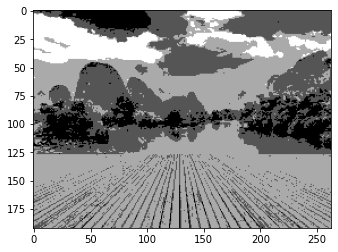

In [12]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

There are four different segments in the above image. You can set different threshold values and check how the segments are made. Some of the advantages of this method are:

* Calculations are simpler
* Fast operation speed
* When the object and background have high contrast, this method performs really well.

But there are some limitations to this approach. When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments.